<h1>class-13</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
df_train = pd.read_csv('dataset/train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_train.shape

(1460, 81)

In [4]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: xlabel='SalePrice', ylabel='Density'>

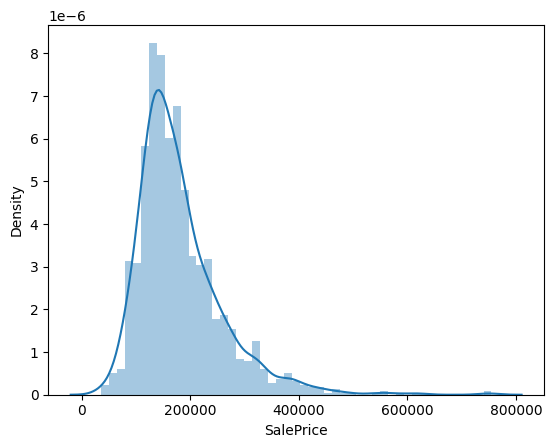

In [6]:
sns.distplot(df_train['SalePrice'])

In [7]:
df_train['SalePrice'].skew(), df_train['SalePrice'].kurt()

(1.8828757597682129, 6.536281860064529)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

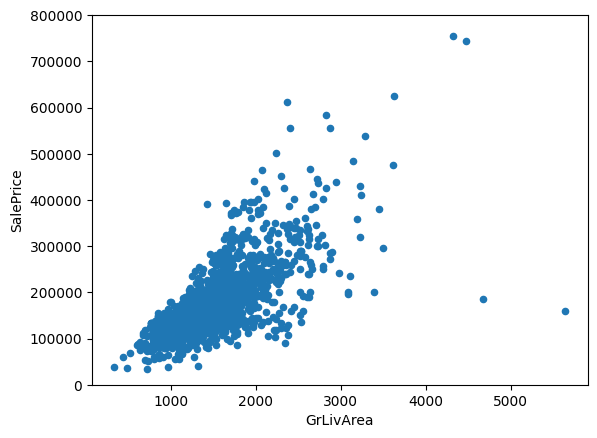

In [8]:
data = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0, 800000))

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

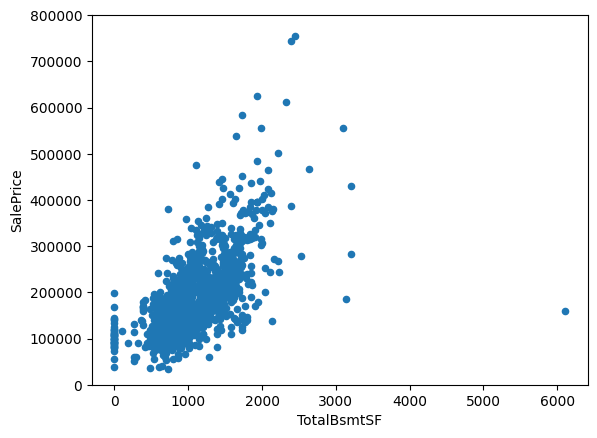

In [9]:
data = pd.concat([df_train['SalePrice'], df_train['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0, 800000))

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

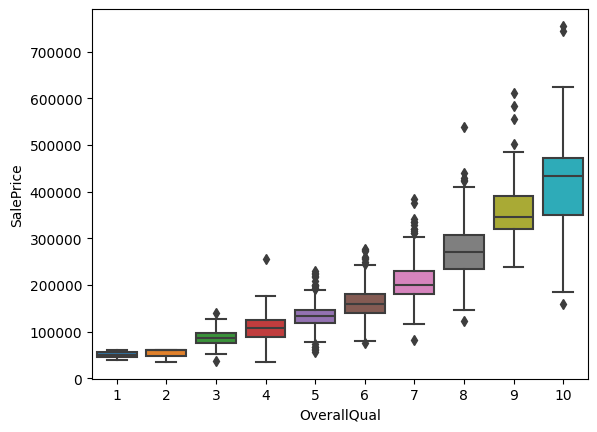

In [10]:
data = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis=1)
sns.boxplot(x='OverallQual', y='SalePrice', data=data) #overallQual categorical value tai boxplot

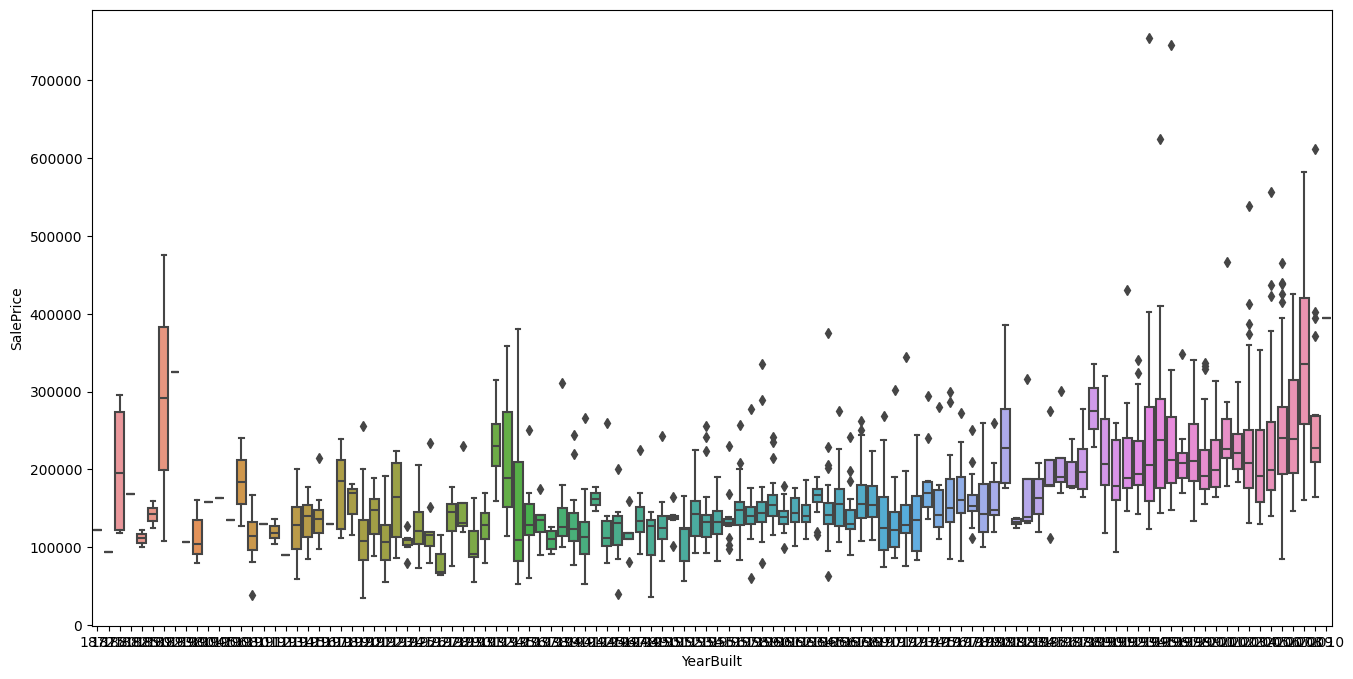

In [11]:
data = pd.concat([df_train['SalePrice'], df_train['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='YearBuilt', y='SalePrice', data=data)

<h1> BELOW TWO LINES ARE VERY IMPORTANT BECAUSE IT CONVERTS CATEGORICAL VALUE TO NUMERICAL VALUE</h1>

<Axes: >

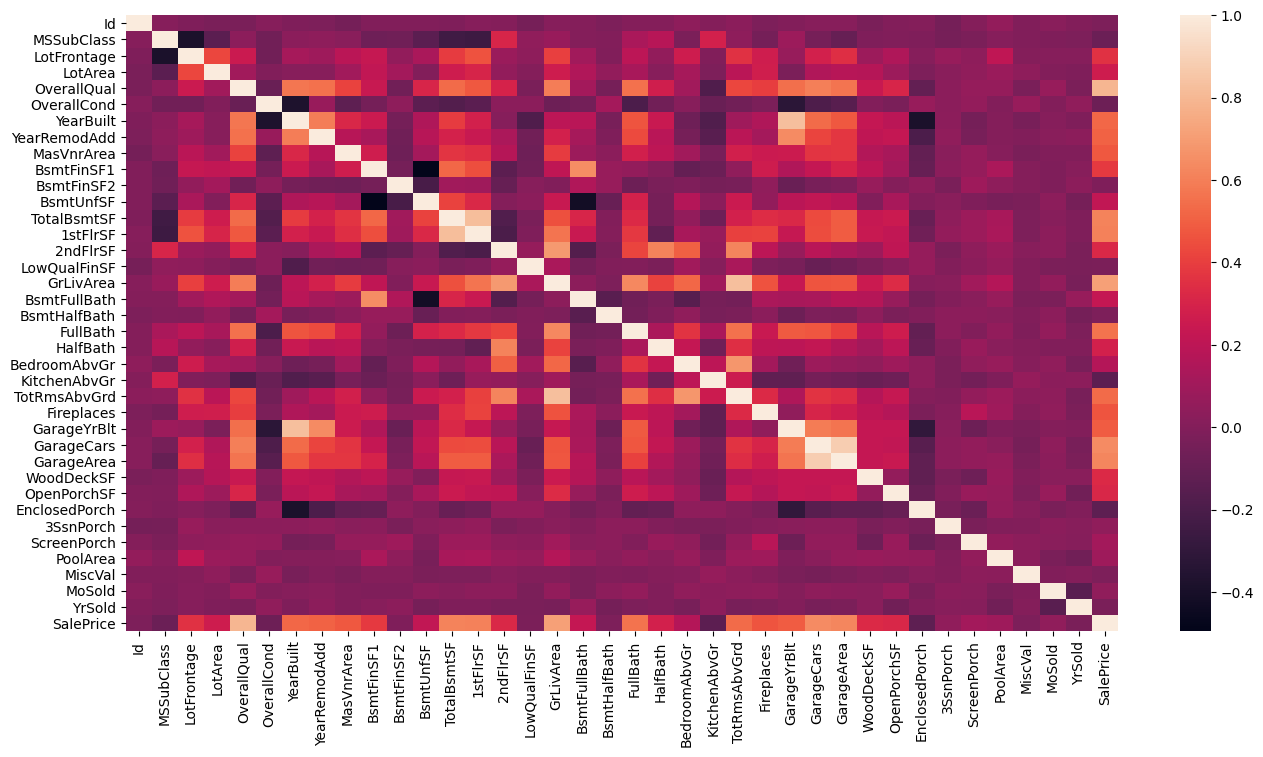

In [12]:

numeric_df = df_train.select_dtypes(include=['number'])  # Select only numeric columns
corr_mat = numeric_df.corr()
f, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(corr_mat)

In [13]:
df_train.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

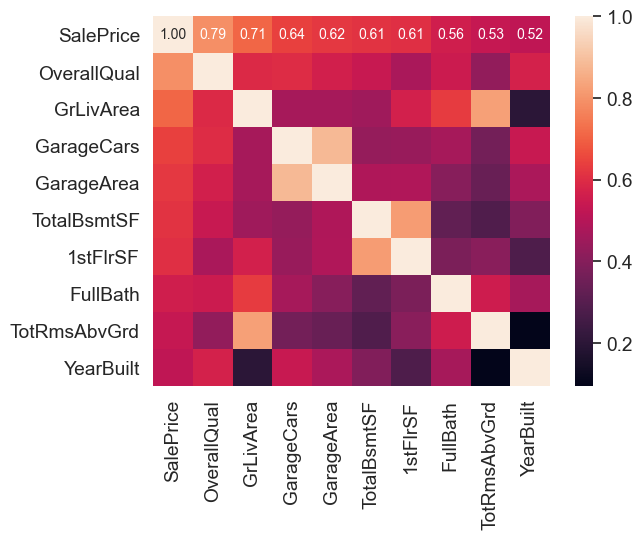

In [14]:
#soceye valo 10 ta feature er satha SalePrice er correlation dekhar chasta korci.akane positive 10 ta correlation dakhno hoyece
k = 10
cols = corr_mat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, annot=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

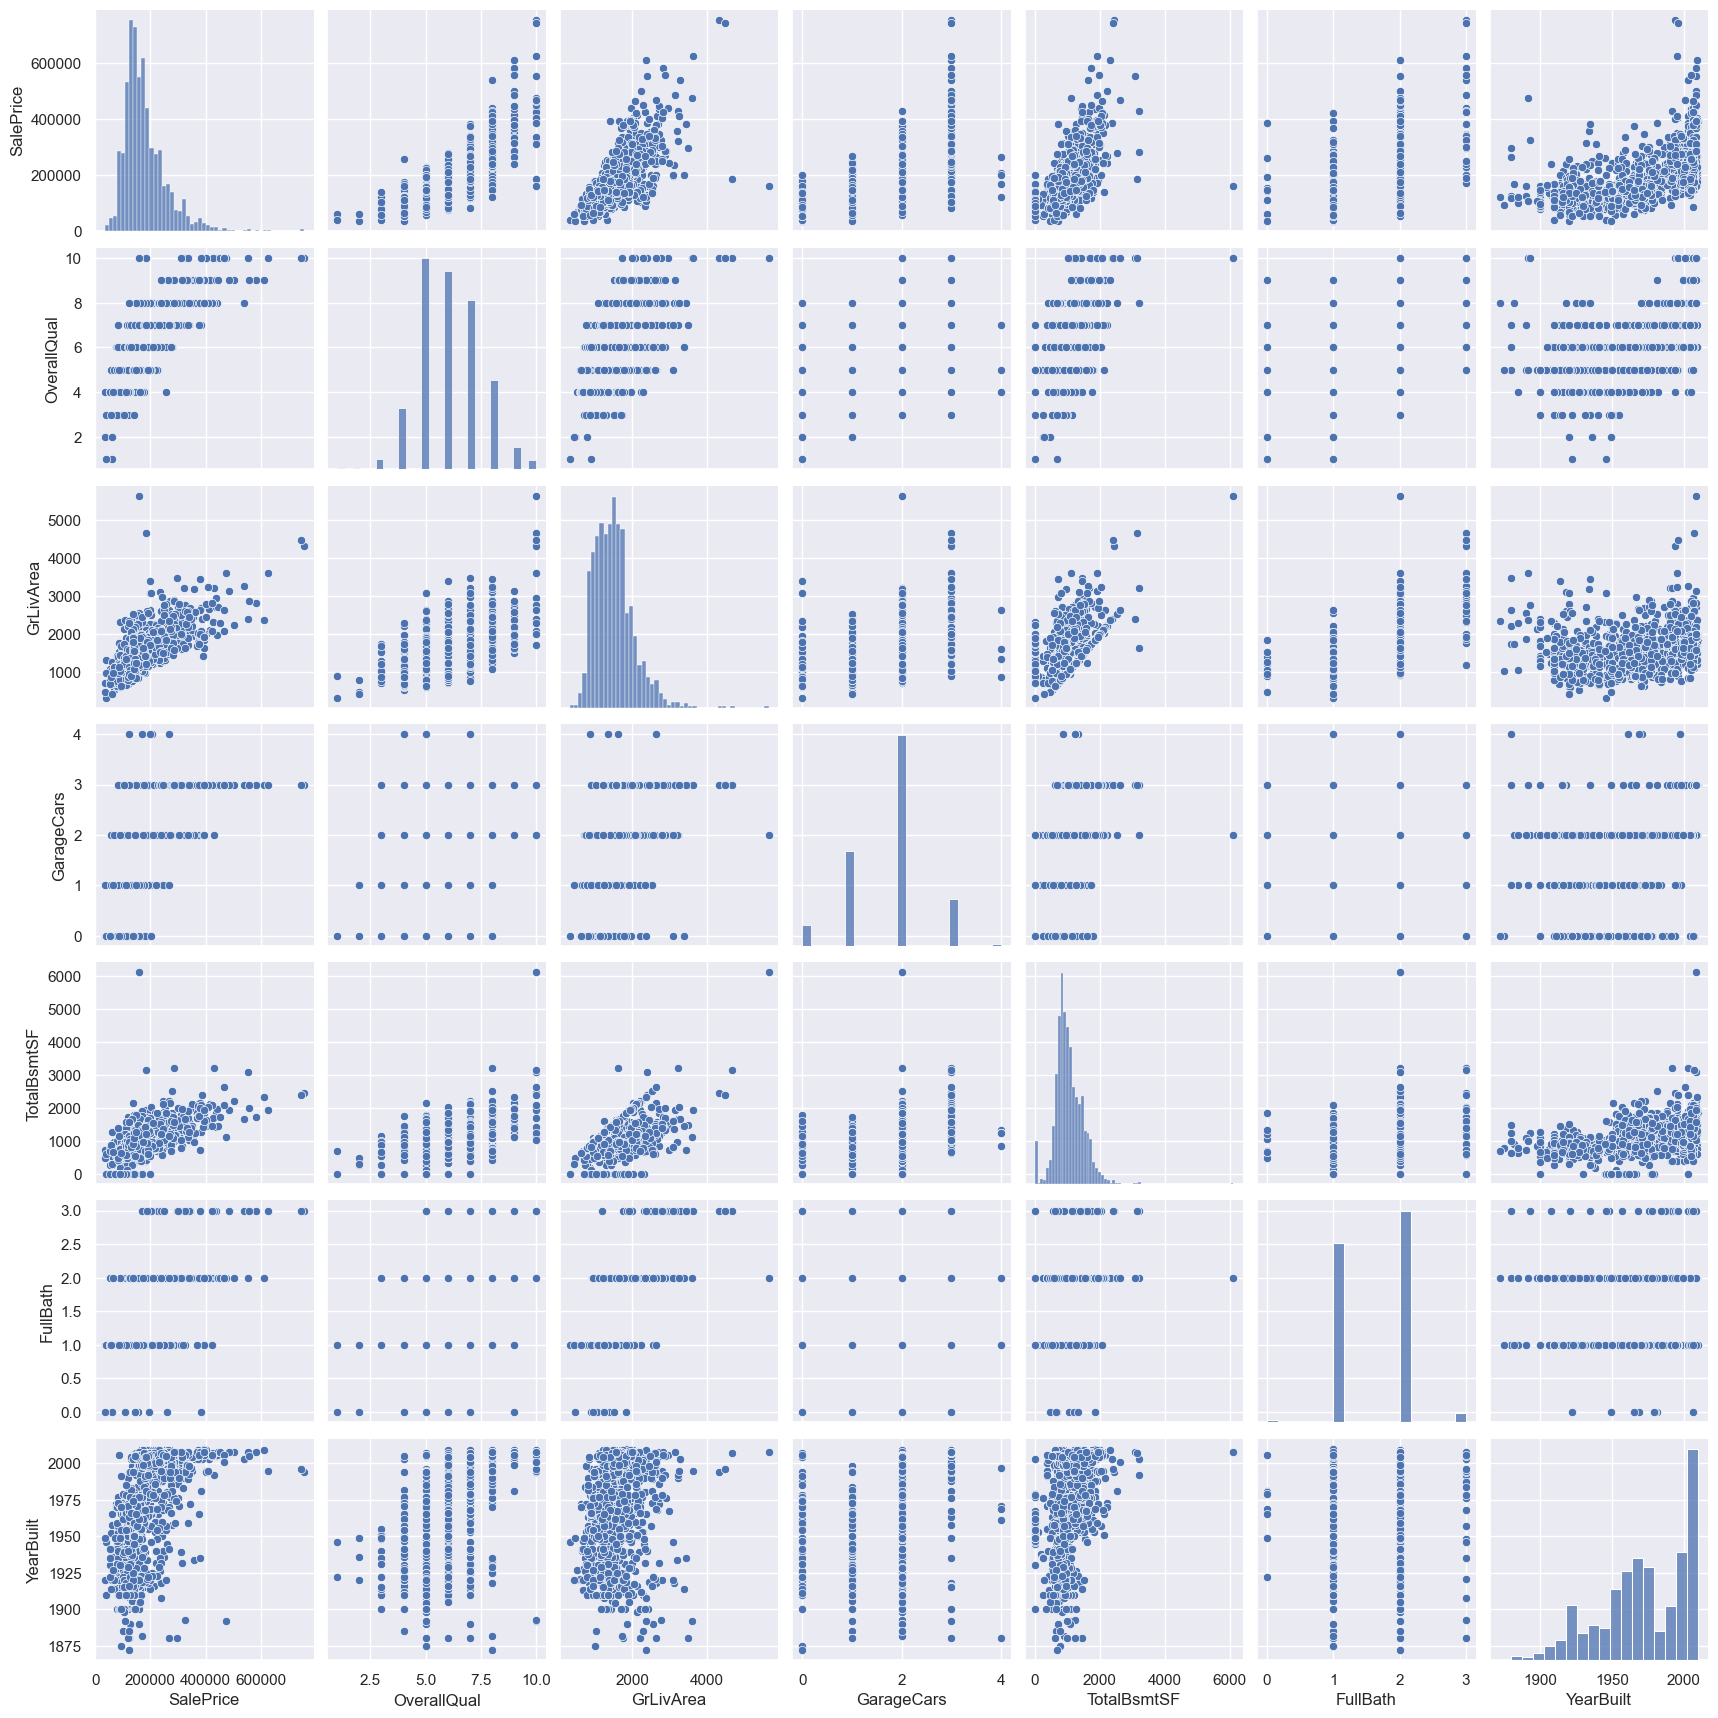

In [15]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

In [16]:
#finding missing data
total=df_train.isnull().sum().sort_values(ascending=False)
percent=(df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head(10)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479


In [17]:
#deleteing  missing value column which has more than one missing value.And creating new Datafram.dada ercode kaj korcilo na tai df_train_m kora
df_train_m= df_train.drop(columns=(missing_data[missing_data['Total']>1]).index)
df_train_n= df_train_m.drop(df_train_m.loc[df_train_m['Electrical'].isnull()].index) #electrrical ei column ta delete korbo.
#electrical ei column niye woory howar kicu nai.
df_train_n.isnull().sum().max()

0

In [18]:
df_train_n.columns #new dataframe er column gulu 

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [19]:
#standardizing data .dada er code ta kaj korcilo na tai chatgpt theke niwa nichere code

# Standardize the entire DataFrame or the relevant subset
scaler = StandardScaler()
df_train_n['SalePrice'] = scaler.fit_transform(df_train_n[['SalePrice']])

# Identify the low and high ranges
low_range = df_train_n['SalePrice'].nsmallest(10)
high_range = df_train_n['SalePrice'].nlargest(10)

print('Outer range (low) of the distribution:')
print(low_range)
print('\nOuter range (high) of the distribution:')
print(high_range)


Outer range (low) of the distribution:
495    -1.838208
916    -1.833034
968    -1.800444
533    -1.782821
30     -1.774010
710    -1.622956
1337   -1.616662
705    -1.585192
1325   -1.585192
812    -1.572692
Name: SalePrice, dtype: float64

Outer range (high) of the distribution:
691     7.226298
1182    7.100420
1169    5.589879
898     5.421919
803     5.060346
1046    4.728631
440     4.708730
769     4.494736
178     4.039522
798     3.827581
Name: SalePrice, dtype: float64


In [20]:
#akhane missing value gulo delete koreci and oi jagai GrLivArea bosaici
df_train_n.sort_values(by='GrLivArea', ascending=False)[:2]
df_train_n = df_train_n.drop(df_train_n[df_train_n['Id'] == 1299].index)
df_train_n = df_train_n.drop(df_train_n[df_train_n['Id'] == 524].index)

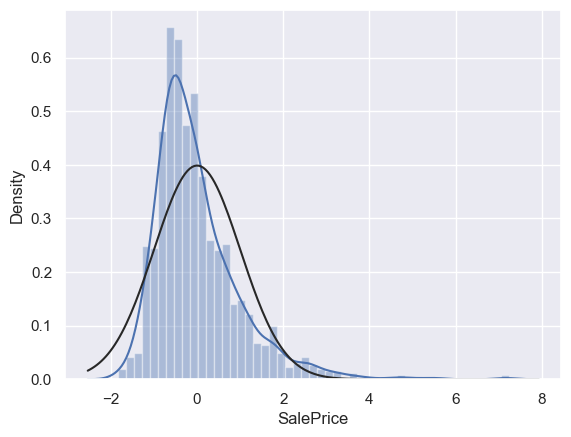

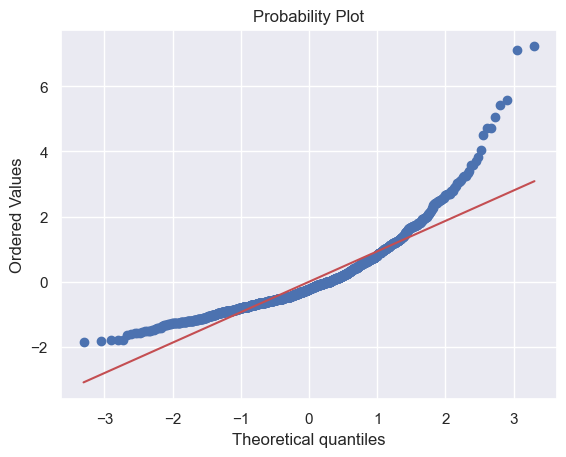

In [21]:
#akon SalePrice normally distributed holo kina deklam
sns.distplot(df_train_n['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train_n['SalePrice'], plot=plt)

In [22]:
#better result er jonno log transform korlam SalePrice a
df_train_n['SalePrice'] = np.log(df_train_n['SalePrice'])

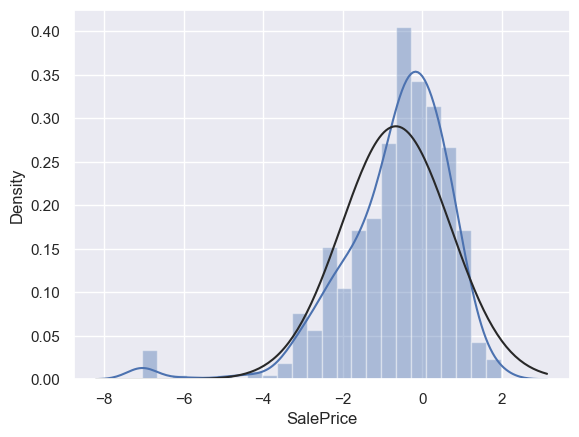

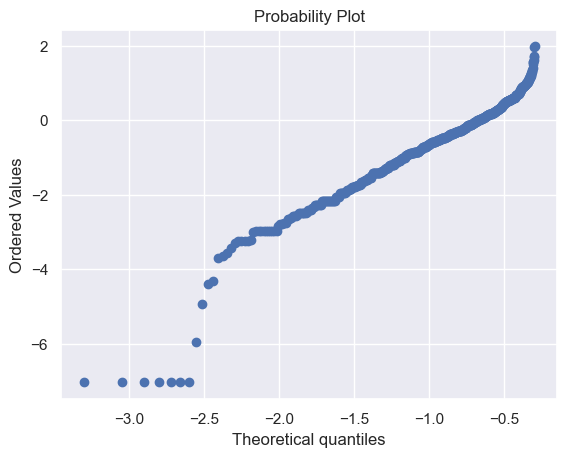

In [23]:
sns.distplot(df_train_n['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train_n['SalePrice'], plot=plt)

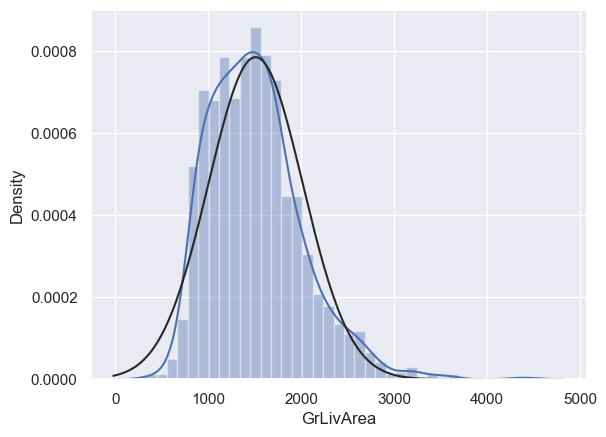

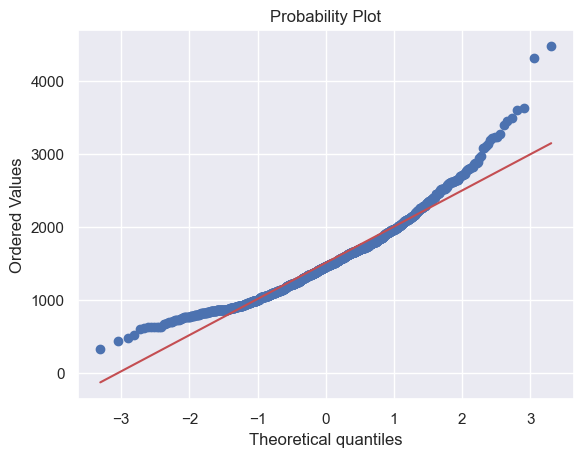

In [24]:
##akon GrLiveArea normally distributed holo kina deklam
sns.distplot(df_train_n['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train_n['GrLivArea'], plot=plt)

In [25]:
#better result er jonno log transform korlam GrLivArea a
df_train_n['GrLivArea'] = np.log(df_train_n['GrLivArea'])

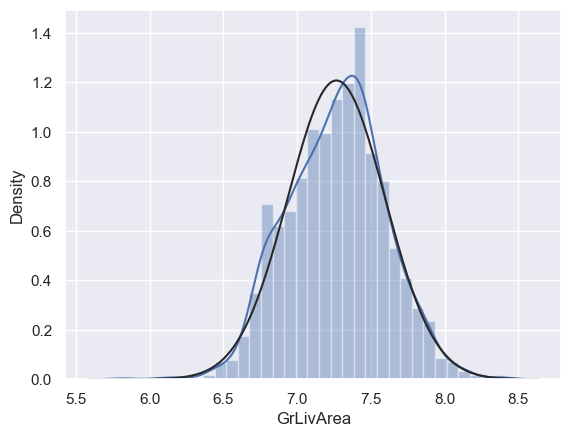

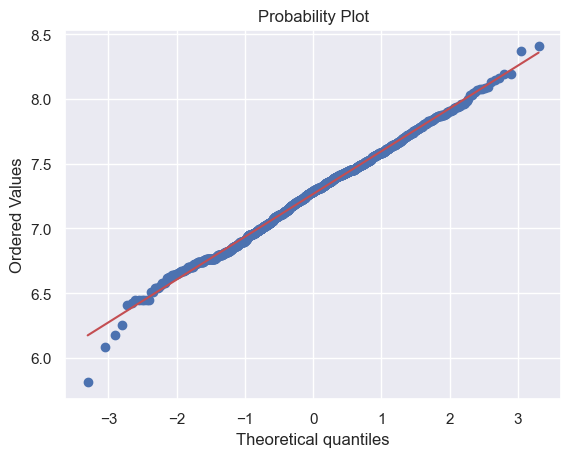

In [26]:
sns.distplot(df_train_n['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train_n['GrLivArea'], plot=plt)

<h1>class-14</h1>

In [27]:
#je feature gulu  correlation  SalePrice er satha .3 er basi tader rakbo
feat = corr_mat[corr_mat['SalePrice']>0.3].index
feat

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

In [28]:
df_train=df_train[['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']]


In [29]:
# Feature Engineering
# upor er ai 19 ta featuer a null value asa kina dakbo

total = df_train.isnull().sum().sort_values(ascending=False) #ascending false sob ceye boro ta upor a thakbe
percent = (df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis = 1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
FullBath,0,0.000000
OpenPorchSF,0,0.000000
WoodDeckSF,0,0.000000
GarageArea,0,0.000000
GarageCars,0,0.000000
Fireplaces,0,0.000000
TotRmsAbvGrd,0,0.000000


In [30]:
#dealing with missing data

# Select columns with "Total" values greater than 81
columns_to_drop = missing_data[missing_data['Total'] > 81].index

# Use the drop method to drop the selected columns
df_train = df_train.drop(columns_to_drop, axis=1)


In [31]:
df_train.isnull().sum().sort_values(ascending=False).head(20)

GarageYrBlt     81
MasVnrArea       8
OverallQual      0
TotRmsAbvGrd     0
OpenPorchSF      0
WoodDeckSF       0
GarageArea       0
GarageCars       0
Fireplaces       0
FullBath         0
YearBuilt        0
GrLivArea        0
2ndFlrSF         0
1stFlrSF         0
TotalBsmtSF      0
BsmtFinSF1       0
YearRemodAdd     0
SalePrice        0
dtype: int64

In [32]:
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(df_train['GarageYrBlt'].mean())
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].mean())

In [33]:
# Categorical boolean mask.Categorical feature gulu dekbo.Ei khane categorical feature nai luckly
categorical_feature_mask = df_train.dtypes==object

# filter categorical columns using mask and turn it into a list
categorical_cols = df_train.columns[categorical_feature_mask].tolist()

In [34]:
categorical_cols

[]

In [35]:
# data = pd.get_dummies(data, columns=categorical_cols)#dummy variable thake ei vabe run kortam .ata just deklam

In [36]:
df_train.shape

(1460, 18)

In [54]:
from sklearn.model_selection import train_test_split

X= df_train.drop('SalePrice', axis=1) #X variable a SalePrice column ta delete korbo karon target vatiable.ata y te rakbo
y = df_train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) #test_size=0.3 mane jodi 100 ta data thake tobe 70 ta cole jabe X train,y train a .Ar 30 ta diye test korabo.

In [55]:
from sklearn.preprocessing import StandardScaler

y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

sc_X = StandardScaler() 
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train) # standadize kore nilam X.y tarin ,test ke
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

In [39]:
X_train

array([[ 1.37391375,  0.60515581,  0.23568488, ...,  1.304123  ,
         3.25041401, -0.72256436],
       [-1.53923947, -2.09440436, -1.72181167, ...,  0.259882  ,
        -0.77348662, -0.72256436],
       [ 0.64562544,  1.24630134,  1.16549575, ...,  0.80552144,
        -0.77348662,  1.1223738 ],
       ...,
       [-0.08266286,  0.26771079, -0.25368926, ..., -0.09760591,
         0.52220938, -0.72256436],
       [ 0.64562544,  1.11132334,  0.96974609, ..., -0.20108925,
         0.57854399, -0.13995231],
       [-0.81095116, -0.44092376, -1.28137495, ...,  0.93722751,
        -0.77348662, -0.72256436]])

In [40]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [41]:
lm.fit(X_train,y_train)
print(lm)

LinearRegression()


In [42]:
predictions = lm.predict(X_test)
predictions= predictions.reshape(-1,1)

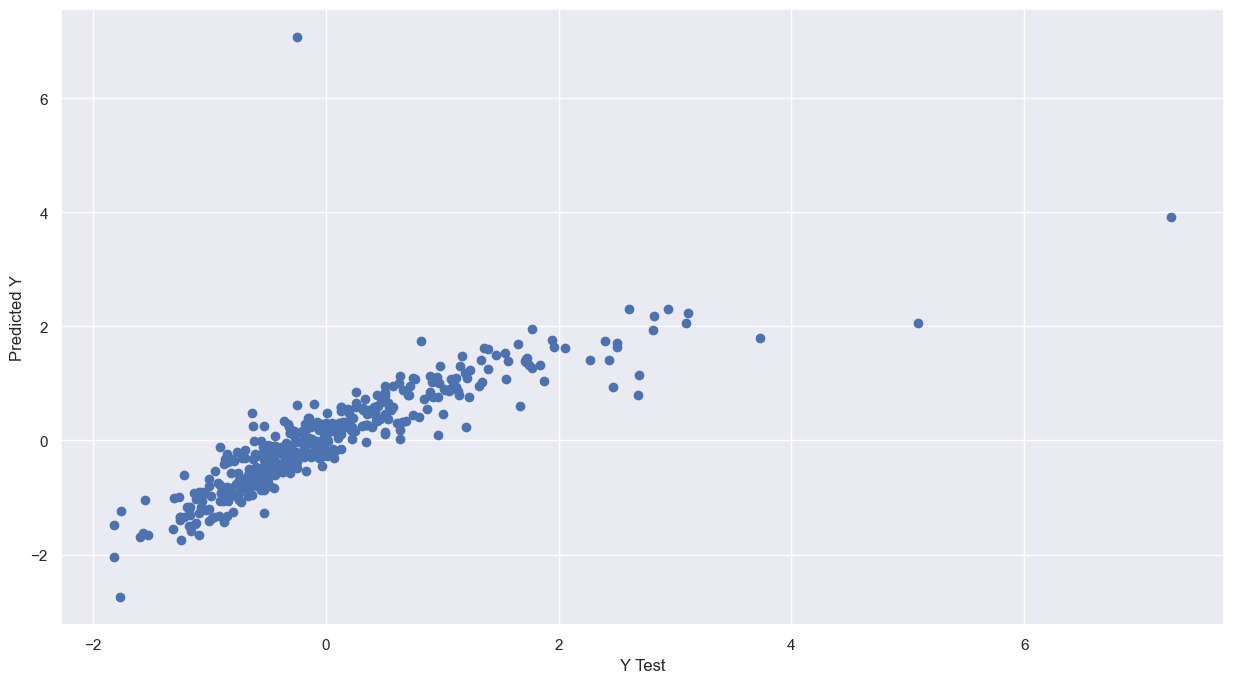

In [43]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

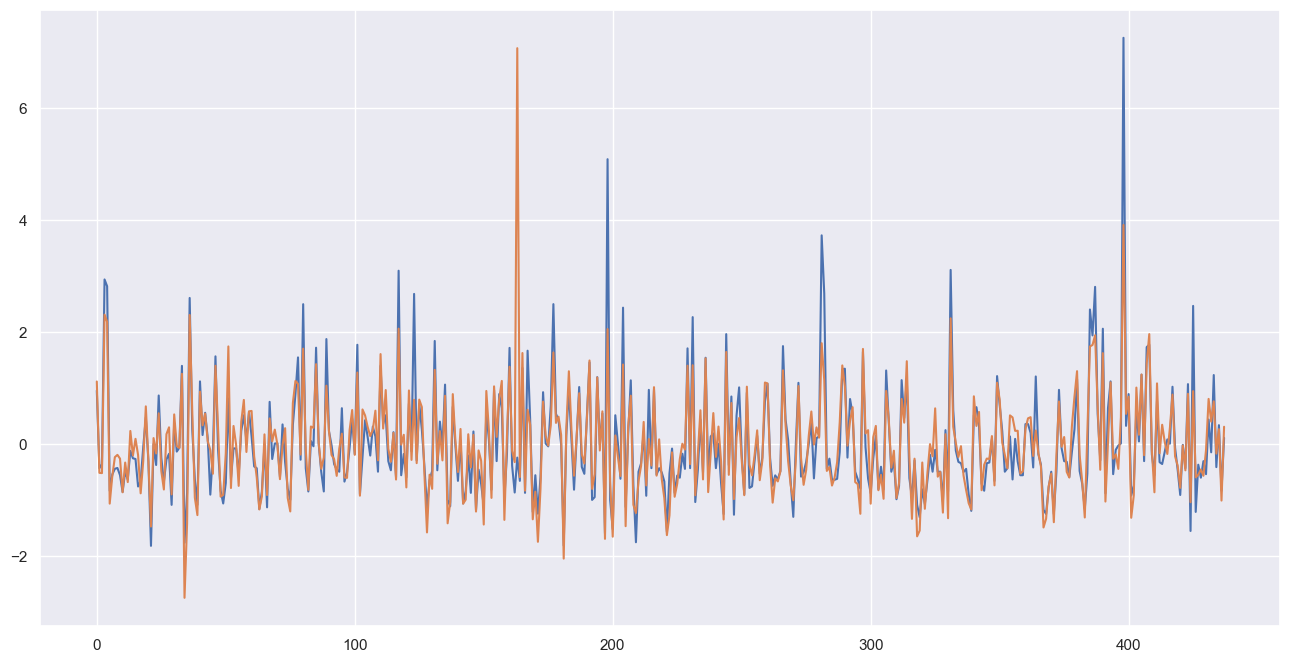

In [44]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(predictions, label = 'predict')
plt.show()

In [45]:
from sklearn import metrics

In [46]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.2893951314527997
MSE: 0.2992402219948464
RMSE: 0.5470285385561218


<h1> dada koyakta model just dekhice</h1>

In [47]:
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
params = {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.05, 'loss': 'squared_error'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=4)

In [49]:
clf_pred=clf.predict(X_test)
clf_pred= clf_pred.reshape(-1,1)

In [50]:
print('MAE:', metrics.mean_absolute_error(y_test, clf_pred))
print('MSE:', metrics.mean_squared_error(y_test, clf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, clf_pred)))

MAE: 0.23642294152630075
MSE: 0.1278431790178523
RMSE: 0.35755164524562366


In [51]:
from sklearn.svm import SVR # SVR (support vector machine)  sob somoy valo kaj kore
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)

SVR()

In [52]:
svr_pred = svr.predict(X_test)
svr_pred= svr_pred.reshape(-1,1)

In [53]:
print('MAE:', metrics.mean_absolute_error(y_test, svr_pred))
print('MSE:', metrics.mean_squared_error(y_test, svr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))

MAE: 0.24652184627345622
MSE: 0.2076847301564523
RMSE: 0.4557244015372145
